## Exercise 1
You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

- Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [120]:
import pandas as pd

df = pd.read_csv('../data/housing-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


In [121]:
print(df.head(), '\n')
print(df.tail())

   sqft  bdrms  age   price
0  2104      3   70  399900
1  1600      3   28  329900
2  2400      3   44  369000
3  1416      2   49  232000
4  3000      4   75  539900 

    sqft  bdrms  age   price
42  2567      4   57  314000
43  1200      3   76  299000
44   852      2   70  179900
45  1852      4   64  299900
46  1203      3   11  239500


In [122]:
df.isnull().sum()

sqft     0
bdrms    0
age      0
price    0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BE80D2A20>,
      dtype=object)

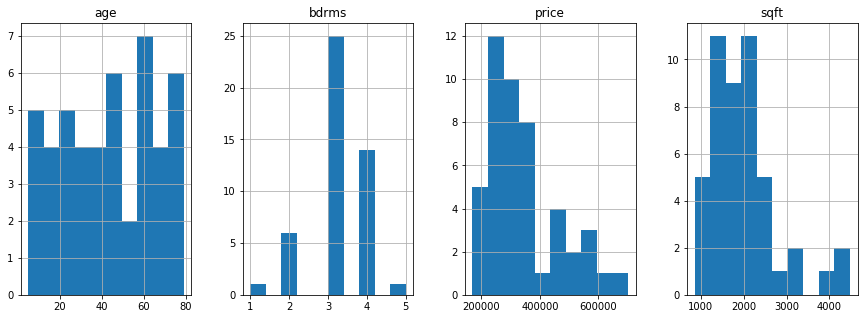

In [123]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1,4,figsize=(15, 5))
df.hist(ax=axis)

In [124]:
X = df[['age', 'bdrms', 'sqft']]
Y = df['price'].values

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [125]:
X.describe()

,age,bdrms,sqft
count,47.000000,47.000000,47.000000
mean,42.744681,3.170213,2000.680851
std,22.873440,0.760982,794.702354
min,5.000000,1.000000,852.000000
25%,24.500000,3.000000,1432.000000
50%,44.000000,3.000000,1888.000000
75%,61.500000,4.000000,2269.000000
max,79.000000,5.000000,4478.000000


In [126]:
# Data standardization
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = scalar.fit_transform(X)
Y = scalar.fit_transform(Y.reshape(-1, 1))

# print(type(X))
# print(type(Y))

# <class 'numpy.ndarray'>
# <class 'numpy.ndarray'>

# print(X.shape)
# print(Y.shape)

# (47, 3)
# (47, 1)

In [48]:
Y = Y.flatten()

# print(Y.shape)
# (47,)

In [49]:
# Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# (37, 3)
# (37,)
# (10, 3)
# (10,)

In [50]:
from keras.layers import Input, Dense
from keras.models import Model

In [51]:
K = 1
visible = Input(shape=(3,))
output = Dense(K)(visible)

model = Model(inputs=visible, outputs=output)

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
)

In [54]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 500, verbose=0, shuffle=True)

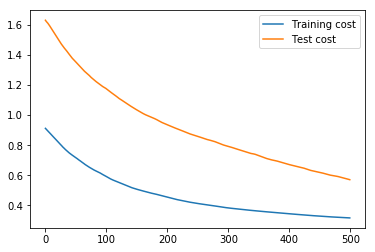

In [55]:
plt.plot(r.history['loss'], label='Training cost')
plt.plot(r.history['val_loss'], label='Test cost')
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import r2_score

Yhat = model.predict(X_test).flatten()
# Yhat.shape
# (10,)

r2_score(y_test, Yhat)

0.58611016520696091

## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/HR_comma_sep.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.shape

(14999, 10)

In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
df['left'].value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [9]:
Y = df['left'].values
df = df.drop(['left'], axis=1)

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A677BDFFD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002A677F546A0>], dtype=object)

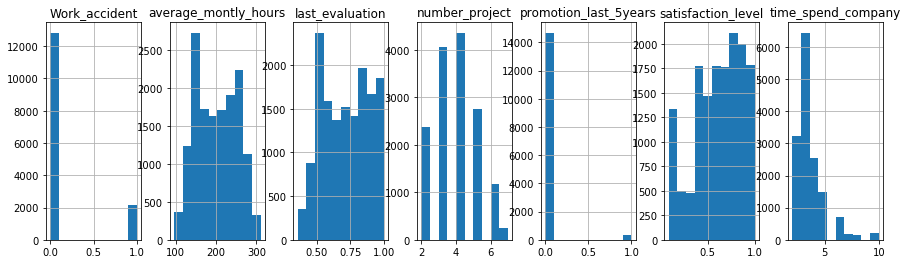

In [11]:
fig, axis = plt.subplots(1,7,figsize=(15, 4))
df.hist(ax=axis)

In [12]:
# Data standardization
# Not using scikit learn standardization as it would convert it into numpy & hence prevent the operations that are followed

df.iloc[:,0:7] = df.iloc[:,0:7].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,-0.936463,-1.087239,-1.462814,-0.882010,-0.341224,-0.411152,-0.147407,sales,low
1,0.752789,0.840679,0.971081,1.220382,1.713379,-0.411152,-0.147407,sales,medium
2,-2.022412,0.957522,2.593677,1.420610,0.343644,-0.411152,-0.147407,sales,medium
3,0.431027,0.899101,0.971081,0.439493,1.028511,-0.411152,-0.147407,sales,low
4,-0.976684,-1.145661,-1.462814,-0.841965,-0.341224,-0.411152,-0.147407,sales,low


In [14]:
df.shape

(14999, 9)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A67802C208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002A6783A16D8>], dtype=object)

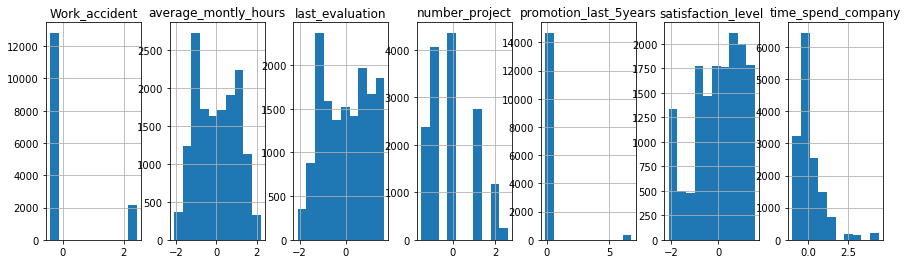

In [15]:
fig, axis = plt.subplots(1,7,figsize=(15, 4))
df.hist(ax=axis)

In [16]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [17]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [18]:
# Using One Hot Encoding to encode categorial columns (sales & salary)
df_new = pd.get_dummies(df, columns=['sales', 'salary'])

In [19]:
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,-0.936463,-1.087239,-1.462814,-0.882010,-0.341224,-0.411152,-0.147407,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.752789,0.840679,0.971081,1.220382,1.713379,-0.411152,-0.147407,0,0,0,0,0,0,0,1,0,0,0,0,1
2,-2.022412,0.957522,2.593677,1.420610,0.343644,-0.411152,-0.147407,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.431027,0.899101,0.971081,0.439493,1.028511,-0.411152,-0.147407,0,0,0,0,0,0,0,1,0,0,0,1,0
4,-0.976684,-1.145661,-1.462814,-0.841965,-0.341224,-0.411152,-0.147407,0,0,0,0,0,0,0,1,0,0,0,1,0


In [20]:
# Initially 9 columns. The two that are categorical are replaced with encoded ones (10 for sales & 3 for salary)
# So 9-2+10+3
df_new.shape

(14999, 20)

In [21]:
Y.shape

(14999,)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_new.values, Y, test_size=0.20)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# (11999, 20)
# (11999,)
# (3000, 20)
# (3000,)

In [23]:
from keras.layers import Input, Dense
from keras.models import Model

K = 1
D = X_train.shape[1]

visible = Input(shape=(D,))
output = Dense(K, activation='sigmoid')(visible)

model = Model(inputs=visible, outputs=output)

Using TensorFlow backend.


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [26]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 20, shuffle=True)

Train on 11999 samples, validate on 3000 samples
Epoch 1/20
11999/11999 [==============================] - 1s - loss: 0.6195 - acc: 0.6794 - val_loss: 0.5343 - val_acc: 0.7420
Epoch 2/20
11999/11999 [==============================] - 1s - loss: 0.4926 - acc: 0.7703 - val_loss: 0.4785 - val_acc: 0.7717
Epoch 3/20
11999/11999 [==============================] - 1s - loss: 0.4552 - acc: 0.7828 - val_loss: 0.4604 - val_acc: 0.7723
Epoch 4/20
11999/11999 [==============================] - 1s - loss: 0.4414 - acc: 0.7839 - val_loss: 0.4525 - val_acc: 0.7693
Epoch 5/20
11999/11999 [==============================] - 2s - loss: 0.4351 - acc: 0.7850 - val_loss: 0.4481 - val_acc: 0.76770.7
Epoch 6/20
11999/11999 [==============================] - 1s - loss: 0.4316 - acc: 0.7866 - val_loss: 0.4457 - val_acc: 0.7673
Epoch 7/20
11999/11999 [==============================] - 1s - loss: 0.4296 - acc: 0.7845 - val_loss: 0.4441 - val_acc: 0.7643
Epoch 8/20
11999/11999 [==============================] - 1

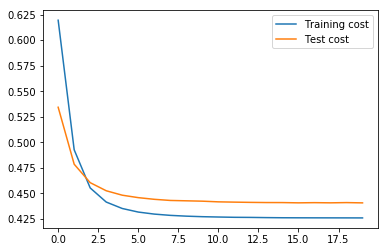

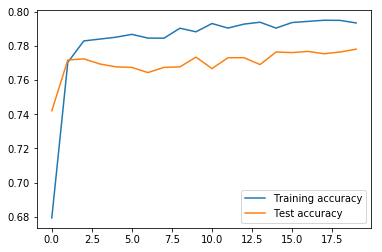

In [27]:
plt.plot(r.history['loss'], label='Training cost')
plt.plot(r.history['val_loss'], label='Test cost')
plt.legend()
plt.show()

plt.plot(r.history['acc'], label='Training accuracy')
plt.plot(r.history['val_acc'], label='Test accuracy')
plt.legend()
plt.show()

In [28]:
# model.evaluate returns the loss value & metrics values (accuracy in this case) for the model in test mode. This is the same
# value that is returned during the model.fit
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Loss %.4f, Accuracy: %.4f" % (loss, acc))

Loss 0.4406, Accuracy: 0.7780


### Perform K-Fold Cross Validation

In [29]:
from keras import backend
backend.clear_session()

X = df_new.values
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)
cv_loss = []
cv_acc = []

for train, test in kfold.split(X, Y):
    # create model
    visible = Input(shape=(D,))
    output = Dense(K, activation='sigmoid')(visible)
    model = Model(inputs=visible, outputs=output)
    # Compile model
    model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    )
    # Fit the model
    model.fit(X[train], Y[train], epochs=20, verbose=0)
    # evaluate the model
    loss, acc = model.evaluate(X[test], Y[test], verbose=0)
    print("loss: %.4f, accuracy: %.4f" % (loss, acc))
    cv_loss.append(loss)
    cv_acc.append(acc)
    
print("\nFinal Loss: %.4f" % (np.mean(cv_loss)))
print("Final Accuracy: %.4f (+/- %.4f)" % (np.mean(cv_acc), np.std(cv_acc)))

loss: 0.4207, accuracy: 0.7913
loss: 0.4239, accuracy: 0.8047
loss: 0.4366, accuracy: 0.7840
loss: 0.4376, accuracy: 0.7893
loss: 0.4296, accuracy: 0.7887
loss: 0.4288, accuracy: 0.7900
loss: 0.4134, accuracy: 0.7867
loss: 0.4334, accuracy: 0.7900
loss: 0.4263, accuracy: 0.7973
loss: 0.4480, accuracy: 0.7772

Final Loss: 0.4298
Final Accuracy: 0.7899 (+/- 0.0070)


### Confusion Matrix

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

predicted = np.round(model.predict(X_test))    # (model.predict(X_test) > 0.5).astype("int32")
matrix = confusion_matrix(y_test, predicted)
print(matrix)

report = classification_report(y_test, predicted)
print('\n', report)

[[2058  174]
 [ 504  264]]

              precision    recall  f1-score   support

          0       0.80      0.92      0.86      2232
          1       0.60      0.34      0.44       768

avg / total       0.75      0.77      0.75      3000

